Some of the code in this lab was copied from the solution at https://github.com/learn-co-curriculum/dsc-removing-trends-lab/tree/solution

# Removing Trends - Lab

## Introduction

In this lab, you'll practice your detrending skills!

## Objectives

You will be able to:
* Learn how to remove trends and seasonality
* Use a log transformation to minimize non-stationarity
* Use rolling means to reduce non-stationarity
* Use differencing to reduce non-stationarity

## Detrending the Airpassenger data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Import passengers.csv and set it as a time-series object. Plot the TS
ts = pd.read_csv('passengers.csv')
ts.head(2)

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118


In [3]:
ts.Month = pd.to_datetime(ts.Month)

In [4]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null datetime64[ns]
#Passengers    144 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.3 KB


In [5]:
ts.set_index('Month', inplace=True)

In [6]:
ts.head(2)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118


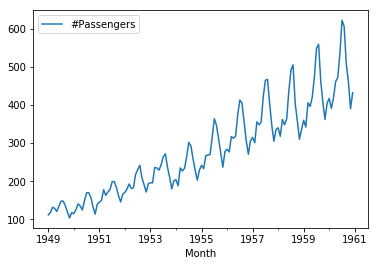

In [7]:
ts.plot();

## Create a stationarity check

At this stage, we can use the code from previous labs to create a function `stationarity_check(ts)` that takes in a time series object and performs stationarity checks including rolling statistics and the Dickey Fuller test. 

We want the output of the function to:
- Plot the original time series along with the rolling mean and rolling standard deviation in one plot
- Output the results of the Dickey-Fuller test

In [8]:
# code in this cell copied from solution at  https://github.com/learn-co-curriculum/dsc-removing-trends-lab/tree/solution

# Create a function to check for the stationarity of a given timeseries using rolling stats and DF test
# Collect and package the code from previous lab
def stationary_check(ts):
    
    #import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    #calculate rolling statistics
    rolmean = ts.rolling(window=8, center=False).mean() 
    rolstd = ts.rolling(window=8, center=False).std()
    
    # perform the df test
    dftest = adfuller(ts['#Passengers'])
    
    #plot rolling statistics
    plt.figure(figsize=(17,8))
    orig = plt.plot(ts, label='original')
    mean = plt.plot(rolmean, label='rolling mean')
    std = plt.plot(rolstd, label='rolling std')
    plt.legend()
    plt.title('Rolling mean and standard deviation')
    plt.show()
    
    # print df test results
    print('Results of DF test')
    dfoutput = pd.Series(dftest[:4], index=['Test statistic', 'p-value', '#lags used', 'number of observations used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None

Use your newly created function on the airpassenger data set.

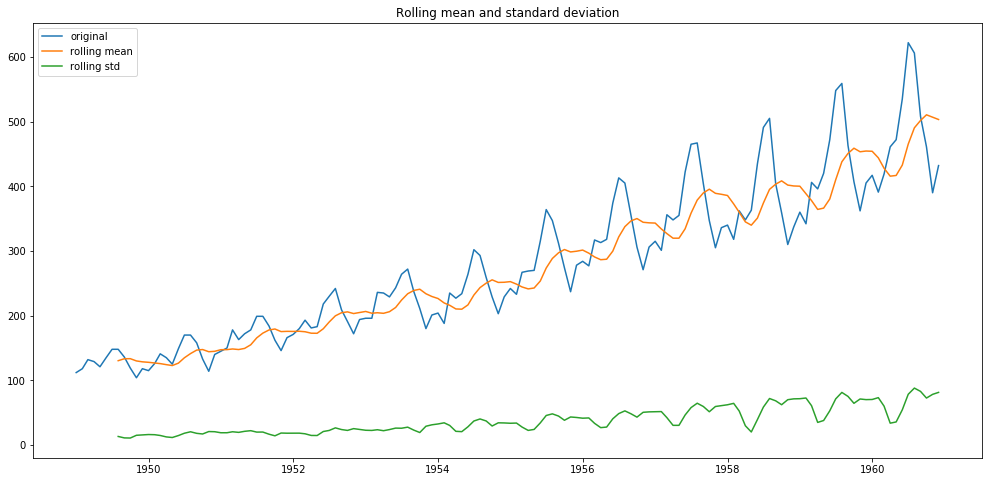

Results of DF test
Test statistic                   0.815369
p-value                          0.991880
#lags used                      13.000000
number of observations used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [9]:
# Code here
stationary_check(ts)

## Perform a log() and sqrt() transform

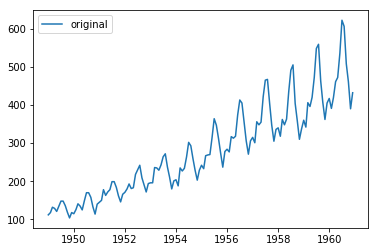

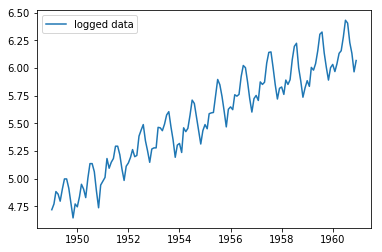

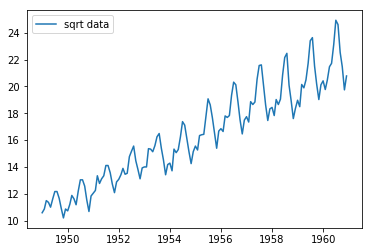

In [11]:
# # code in this cell copied from solution at  https://github.com/learn-co-curriculum/dsc-removing-trends-lab/tree/solution

# Log transform timeseries and compare with original to check the effect
ts_log = np.log(ts)
ts_sqrt = np.sqrt(ts)
plt.plot(ts, label='original')
plt.legend()
plt.show()
plt.plot(ts_log, label='logged data')
plt.legend()
plt.show()
plt.plot(ts_sqrt, label='sqrt data')
plt.legend()
plt.show()

moving forward, let's keep working with the log transformed data before subtracting rolling mean, differencing, etc.

## Subtracting the rolling mean

Create a rolling mean using your log transformed time series, with a time window of 7. Plot the log-transformed time series and the rolling mean together.

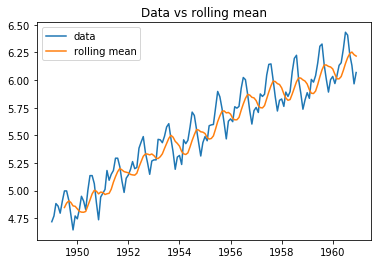

In [13]:
# code in this cell copied from solution at  https://github.com/learn-co-curriculum/dsc-removing-trends-lab/tree/solution

rolmean = ts_log.rolling(window=7).mean()
orig = plt.plot(ts_log, label='data')
mean = plt.plot(rolmean, label='rolling mean')
plt.legend()
plt.title('Data vs rolling mean')
plt.show();

Now, subtract the rolling mean from the time series, look at the 10 first elements of the result and plot the result.

In [14]:
# code in this cell copied from solution at  https://github.com/learn-co-curriculum/dsc-removing-trends-lab/tree/solution

# Subtract the moving average from the original data and check head for Nans

data_minus_rolmean = ts_log - rolmean
data_minus_rolmean.head(3)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN


In [15]:
# code in this cell copied from solution at  https://github.com/learn-co-curriculum/dsc-removing-trends-lab/tree/solution

# Drop the NaN values from timeseries calculated above
data_minus_rolmean.dropna(inplace=True)

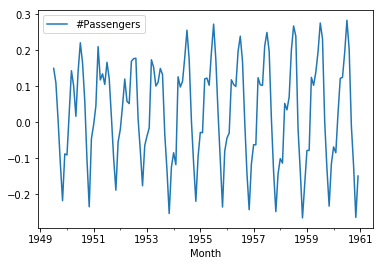

In [17]:
# Plot the result
data_minus_rolmean.plot();

Finally, use your function `check_stationarity` to see if this series is considered stationary!

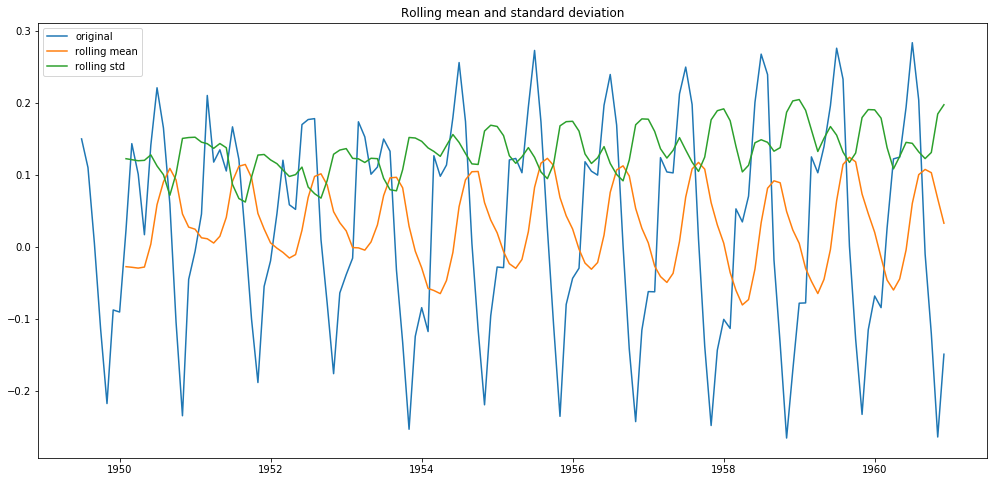

Results of DF test
Test statistic                  -2.348027
p-value                          0.156946
#lags used                      14.000000
number of observations used    123.000000
Critical Value (1%)             -3.484667
Critical Value (5%)             -2.885340
Critical Value (10%)            -2.579463
dtype: float64


In [18]:
# code in this cell copied from solution at  https://github.com/learn-co-curriculum/dsc-removing-trends-lab/tree/solution

stationary_check(data_minus_rolmean)

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


In [19]:
# The data is much closer to being stationary, but the p-value is still above 0.05. I would want it to be below 0.05

## Subtracting the weighted rolling mean

Repeat all the above for the *weighter* rolling mean. Start from the log-transformed data again. Compare the Dickey-Fuller Test results. What do you conclude?

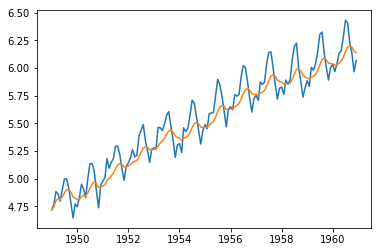

In [23]:
# code in this cell copied from solution at  https://github.com/learn-co-curriculum/dsc-removing-trends-lab/tree/solution

# Use Pandas ewma() to calculate Weighted Moving Average of ts_log

# Plot the original data with exp weighted average

exp_rolmean = ts_log.ewm(halflife=4).mean()
plt.plot(ts_log, label='logged data')
plt.plot(exp_rolmean, label='exp_rolmean')

In [24]:
# Subtract the moving average from the original data and plot
ts_minus_exp_rolmean = ts_log - exp_rolmean

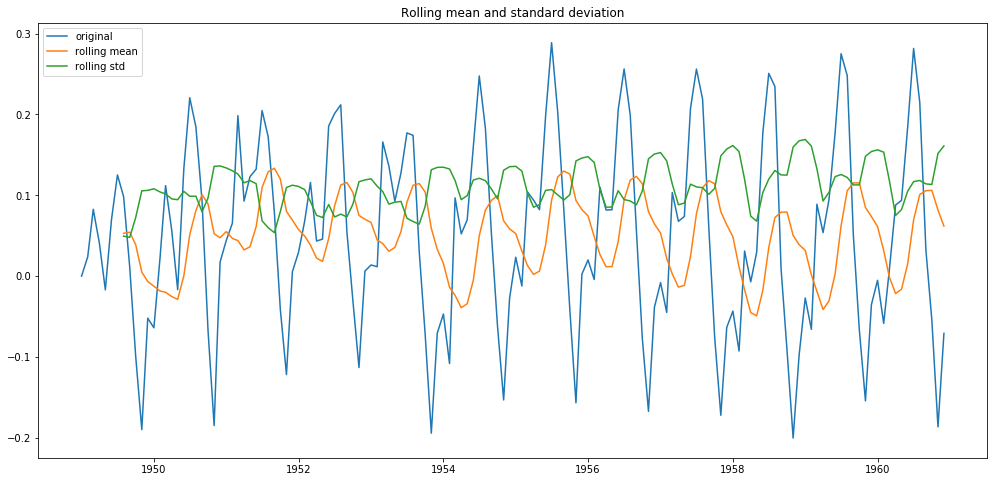

Results of DF test
Test statistic                  -3.297250
p-value                          0.015002
#lags used                      13.000000
number of observations used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [25]:
# do a stationarity check
stationary_check(ts_minus_exp_rolmean)

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


In [26]:
# The data is now stationary. the p-value is below 0.05

## Differencing

Using exponentially weighted moving averages, we seem to have removed the upward trend, but not the seasonality issue. Now use differencing to remove seasonality. Make sure you use the right amount of `periods`. Start from the log-transformed, exponentially weighted rolling mean-subtracted series.

After you differenced the series, run the `stationarity check` again.

In [27]:
# code in this cell copied from solution at  https://github.com/learn-co-curriculum/dsc-removing-trends-lab/tree/solution

# difference your data and look at the head
data_diff = ts_minus_exp_rolmean.diff(periods=12)
data_diff.head()

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN


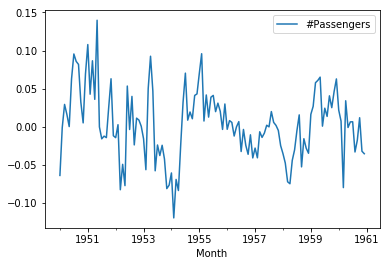

In [30]:
# code in this cell copied from solution at  https://github.com/learn-co-curriculum/dsc-removing-trends-lab/tree/solution
# plot your differenced time series

data_diff.plot();

In [31]:
# code in this cell copied from solution at  https://github.com/learn-co-curriculum/dsc-removing-trends-lab/tree/solution# 
data_diff.dropna(inplace=True)

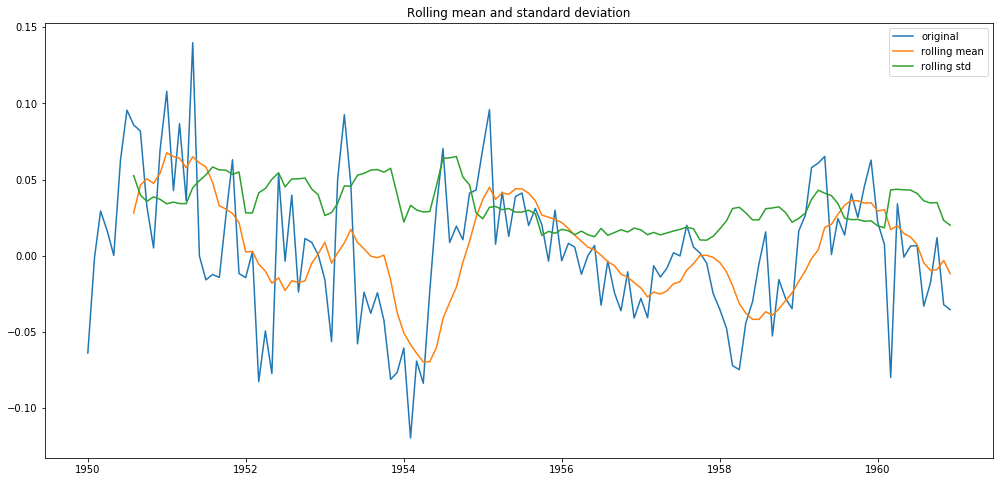

Results of DF test
Test statistic                  -3.601666
p-value                          0.005729
#lags used                      12.000000
number of observations used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [32]:
# code in this cell copied from solution at  https://github.com/learn-co-curriculum/dsc-removing-trends-lab/tree/solution
# perform the stationarity check
stationary_check(data_diff)

### Your conclusion

In [33]:
# The time series is now definately stationary

## Summary 

In this lab, you learned how to make time series stationary through using log transforms, rolling means and differencing.